In [ ]:
!pip install ultralytics

In [ ]:
yaml_content = """
path: /kaggle/input/falldetectiondatasetlabeling/Fall-Detection.v2i.yolov8/Fall-Detection.v2i.yolov8

train: ../train
val: ../valid
test: ../test

kpt_shape: [17, 3]
flip_idx: [0, 2, 1, 4, 3, 6, 5, 8, 7, 10, 9, 12, 11, 14, 13, 16, 15]

names:
  0: person
  1: fall
"""

with open('/kaggle/working/data.yaml', 'w') as f:
    f.write(yaml_content.strip())

In [ ]:
from ultralytics import YOLO

# Tải mô hình pose YOLOv8 nano
model = YOLO('/kaggle/input/falldetectiondatasetlabeling/best.pt')

In [ ]:
model.train(
    data= r'/kaggle/working/data.yaml',
    epochs=150,         # hoặc 150 nếu bạn muốn dùng hết 30 giờ
    imgsz=640,
    batch=64,           # nếu đủ VRAM (~8GB trở lên với YOLOv8n)
    cache=True,         # nếu RAM >= 30GB
    device=0,
    workers=2,
    patience=20,         # tự dừng nếu không cải thiện sau 20 epochs
    save_period=1
)

In [ ]:
!zip -r /kaggle/working/runs.zip /kaggle/working/runs

## Predict

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/kaggle/working/runs/pose/train/results.csv')
epochs = df.index + 1  # Epochs bắt đầu từ 1

# === Biểu đồ Train Box Loss ===
plt.figure(figsize=(8, 5))
plt.plot(epochs, df['train/box_loss'], label='Train Box Loss', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Box Loss theo Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Biểu đồ Val Box Loss ===
plt.figure(figsize=(8, 5))
plt.plot(epochs, df['val/box_loss'], label='Val Box Loss', color='r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Val Box Loss theo Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Biểu đồ Train Pose Loss ===
plt.figure(figsize=(8, 5))
plt.plot(epochs, df['train/pose_loss'], label='Train Pose Loss', color='g')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Pose Loss theo Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Biểu đồ Val Pose Loss ===
plt.figure(figsize=(8, 5))
plt.plot(epochs, df['val/pose_loss'], label='Val Pose Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Val Pose Loss theo Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Biểu đồ Precision (P) ===
plt.figure(figsize=(8, 5))
plt.plot(epochs, df['metrics/precision(P)'], label='Precision (P)', color='purple')
plt.xlabel('Epoch')
plt.ylabel('Precision (%)')
plt.title('Precision (P) theo Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Biểu đồ Recall (P) ===
plt.figure(figsize=(8, 5))
plt.plot(epochs, df['metrics/recall(P)'], label='Recall (P)', color='cyan')
plt.xlabel('Epoch')
plt.ylabel('Recall (%)')
plt.title('Recall (P) theo Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Biểu đồ mAP50 (P) ===
plt.figure(figsize=(8, 5))
plt.plot(epochs, df['metrics/mAP50(P)'], label='mAP50 (P)', color='brown')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('mAP50 (P) theo Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Biểu đồ mAP50-95 (P) ===
plt.figure(figsize=(8, 5))
plt.plot(epochs, df['metrics/mAP50-95(P)'], label='mAP50-95 (P)', color='pink')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('mAP50-95 (P) theo Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Biểu đồ mAP50 (B) ===
plt.figure(figsize=(8, 5))
plt.plot(epochs, df['metrics/mAP50(B)'], label='mAP50 (B)', color='indigo')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('mAP50 (B) theo Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Biểu đồ mAP50-95 (B) ===
plt.figure(figsize=(8, 5))
plt.plot(epochs, df['metrics/mAP50-95(B)'], label='mAP50-95 (B)', color='yellow')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('mAP50-95 (B) theo Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!split -b 200m /kaggle/working/runs.zip /kaggle/working/runs.zip.part_

In [ ]:
from IPython.display import FileLink
FileLink('/kaggle/working/runs.zip.part_aa')

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [6]:
yaml_content = """
path: /kaggle/input/falldetectiondatasetlabeling/Fall-Detection.v2i.yolov8/Fall-Detection.v2i.yolov8

train: ../train
val: ../valid
test: ../test

kpt_shape: [17, 3]
flip_idx: [0, 2, 1, 4, 3, 6, 5, 8, 7, 10, 9, 12, 11, 14, 13, 16, 15]

names:
  0: person
  1: fall
"""

with open('/kaggle/working/data.yaml', 'w') as f:
    f.write(yaml_content.strip())

In [ ]:
from ultralytics import YOLO
import os

# Đường dẫn tới model đã fine-tuned (.pt)
MODEL_PATH = '/kaggle/working/runs/pose/train/weights/best.pt'

# Đường dẫn tới tập test
# Có thể là thư mục chứa ảnh hoặc 1 file txt/yaml/dataset định nghĩa
TEST_DATA_PATH = '/kaggle/working/data.yaml'  # chứa test: path/to/test/images

# Tải model YOLOv8 Pose
model = YOLO(MODEL_PATH)

# Chạy test (evaluate) – cần tập test có nhãn thì mới tính được mAP
metrics = model.val(
    data=TEST_DATA_PATH,
    split='test',  # dùng tập test
    imgsz=640,
    conf=0.25,
    iou=0.5,
    max_det=100,
    batch=16,
    save=True,           # lưu hình ảnh output có vẽ pose
    save_txt=True,       # lưu tọa độ keypoints dưới dạng txt
    save_conf=True,      # lưu độ tin cậy (confidence) của keypoints
    verbose=True
)

Ultralytics 8.3.136 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n-pose summary (fused): 81 layers, 3,290,159 parameters, 0 gradients, 9.2 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 4.57MB/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 11.8±3.9 MB/s, size: 66.1 KB)


val: Scanning /kaggle/input/falldetectiondatasetlabeling/Fall-Detection.v2i.yolov8/Fall-Detection.v2i.yolov8/test/labels... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<00:00, 179.50it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/falldetectiondatasetlabeling/Fall-Detection.v2i.yolov8/Fall-Detection.v2i.yolov8/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]


                   all         15         30      0.909      0.733      0.827      0.435      0.825      0.667      0.745      0.509
                person         15         30      0.909      0.733      0.827      0.435      0.825      0.667      0.745      0.509


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 5.1ms preprocess, 210.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/pose/val3


In [10]:
# In ra thông số đánh giá
print("==== Evaluation Metrics ====")
for k, v in metrics.results_dict.items():
    print(f"{k}: {v}")

==== Evaluation Metrics ====
metrics/precision(B): 0.9086238846080607
metrics/recall(B): 0.7333333333333333
metrics/mAP50(B): 0.8266805124223604
metrics/mAP50-95(B): 0.43469247038948555
metrics/precision(P): 0.8249107338133826
metrics/recall(P): 0.6666666666666666
metrics/mAP50(P): 0.7453773291925466
metrics/mAP50-95(P): 0.5087617711103656
fitness: 1.0063146015113569


In [12]:
# Chạy dự đoán
results = model.predict(
    source='/kaggle/input/falldetectiondatasetlabeling/Fall-Detection.v2i.yolov8/Fall-Detection.v2i.yolov8/test/images',
    imgsz=640,
    conf=0.25,
    save=True,         # Lưu ảnh đã vẽ keypoints
    save_txt=True,     # Lưu keypoints ra file .txt
    save_conf=True     # Lưu độ tin cậy (confidence) cho mỗi keypoint
)



image 1/15 /kaggle/input/falldetectiondatasetlabeling/Fall-Detection.v2i.yolov8/Fall-Detection.v2i.yolov8/test/images/000000002006_jpg.rf.130a372324f89981d108ecb8bedb9f1c.jpg: 640x640 1 person, 179.3ms
image 2/15 /kaggle/input/falldetectiondatasetlabeling/Fall-Detection.v2i.yolov8/Fall-Detection.v2i.yolov8/test/images/000000002153_jpg.rf.8e7762ba60aa02d48a244140a22e8ba6.jpg: 640x640 4 persons, 1 fall, 154.0ms
image 3/15 /kaggle/input/falldetectiondatasetlabeling/Fall-Detection.v2i.yolov8/Fall-Detection.v2i.yolov8/test/images/000000006954_jpg.rf.9d3de65021e176d5fc87e1566725dbeb.jpg: 640x640 5 persons, 2 falls, 153.8ms
image 4/15 /kaggle/input/falldetectiondatasetlabeling/Fall-Detection.v2i.yolov8/Fall-Detection.v2i.yolov8/test/images/000000009378_jpg.rf.8a98618d2c6f7d893bf0a89b97918274.jpg: 640x640 1 fall, 154.3ms
image 5/15 /kaggle/input/falldetectiondatasetlabeling/Fall-Detection.v2i.yolov8/Fall-Detection.v2i.yolov8/test/images/000000009772_jpg.rf.1f9cf35c3b365ab33f286d315a922118.jpg

In [17]:
!pip install matplotlib


 Ảnh đã vẽ lưu tại: runs/pose/predict


/tmp/ipykernel_35/2743072421.py:28: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from current font.
  plt.tight_layout(h_pad=3)  # khoảng cách dọc giữa các ảnh
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


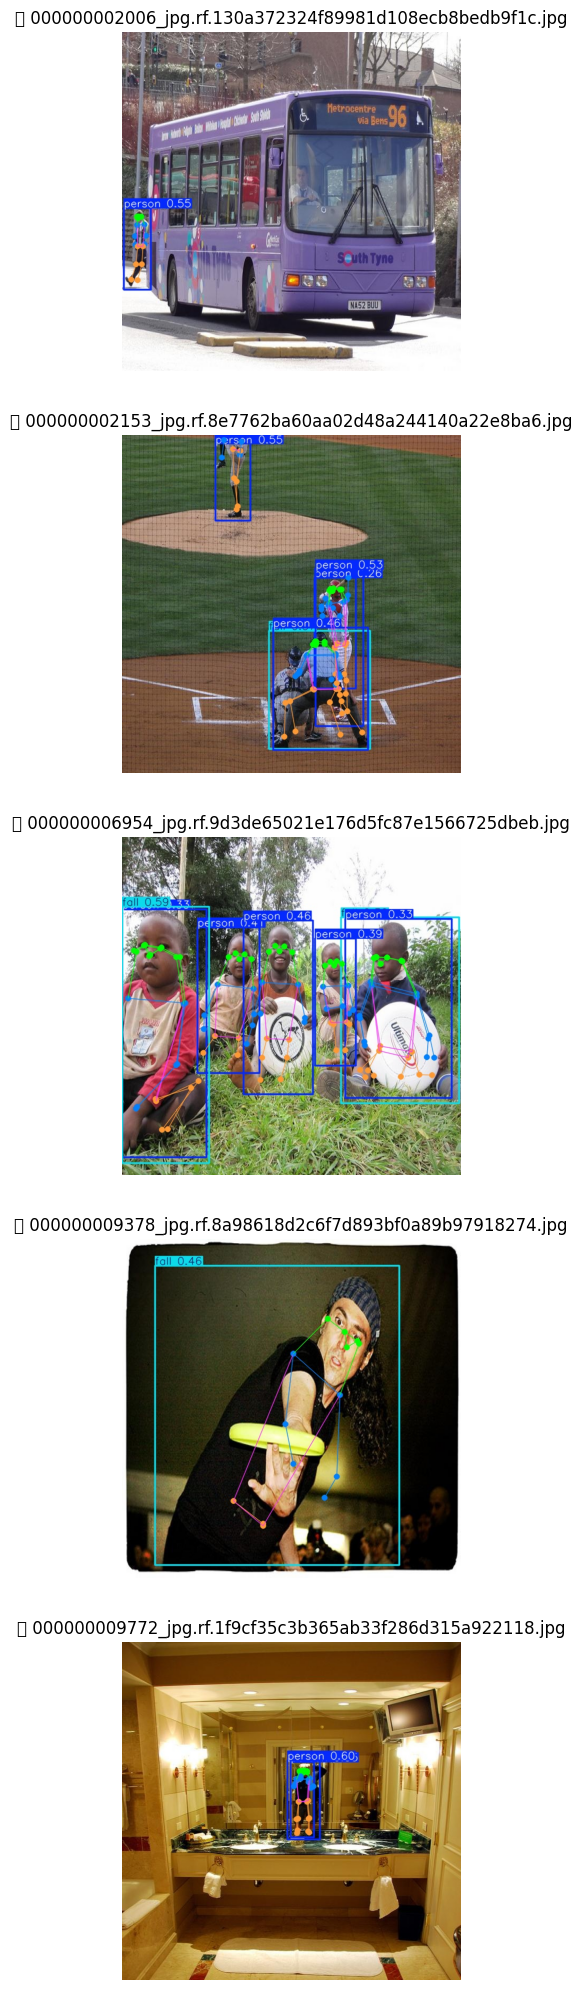

In [21]:
import matplotlib.pyplot as plt
import cv2
import os

# Lấy thư mục chứa ảnh đầu ra đã được vẽ keypoints
output_dir = model.predictor.save_dir
print(f"\n Ảnh đã vẽ lưu tại: {output_dir}")

# Hiển thị ảnh theo chiều dọc
image_files = sorted([f for f in os.listdir(output_dir) if f.endswith(('.jpg', '.png'))])

# Số ảnh muốn hiển thị
num_images_to_show = min(5, len(image_files))

# Kích thước mỗi ảnh
plt.figure(figsize=(6, num_images_to_show * 4))  # Chiều cao mở rộng

for i in range(num_images_to_show):
    img_path = os.path.join(output_dir, image_files[i])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(num_images_to_show, 1, i + 1)
    plt.imshow(img)
    plt.title(f"🖼️ {image_files[i]}")
    plt.axis('off')

plt.tight_layout(h_pad=3)  # khoảng cách dọc giữa các ảnh
plt.show()


In [22]:
!zip -r /kaggle/working/predict.zip /kaggle/working/runs/pose/predict

  adding: kaggle/working/runs/pose/predict/ (stored 0%)
  adding: kaggle/working/runs/pose/predict/000000002006_jpg.rf.130a372324f89981d108ecb8bedb9f1c.jpg (deflated 5%)
  adding: kaggle/working/runs/pose/predict/000000014439_jpg.rf.49ce132b69b6fc5610ffcbc4b27a0e6e.jpg (deflated 4%)
  adding: kaggle/working/runs/pose/predict/000000009378_jpg.rf.8a98618d2c6f7d893bf0a89b97918274.jpg (deflated 4%)
  adding: kaggle/working/runs/pose/predict/000000013177_jpg.rf.6f619e898b1b3b1cb14b2fab0e9eed5d.jpg (deflated 3%)
  adding: kaggle/working/runs/pose/predict/000000043435_jpg.rf.741a0c1a8a9a2ab7a288272a97335ae2.jpg (deflated 5%)
  adding: kaggle/working/runs/pose/predict/000000040036_jpg.rf.dd6d3a128c09f5a9c0b9082212275c6f.jpg (deflated 4%)
  adding: kaggle/working/runs/pose/predict/000000034452_jpg.rf.cfe7bfcaa0674bb31416a4b28a45c00d.jpg (deflated 7%)
  adding: kaggle/working/runs/pose/predict/000000010764_jpg.rf.ee5e238e3fc465e6b3d80b274f5c8353.jpg (deflated 4%)
  adding: kaggle/working/runs/po

In [24]:
!zip -r /kaggle/working/val.zip /kaggle/working/runs/pose/val3

  adding: kaggle/working/runs/pose/val3/ (stored 0%)
  adding: kaggle/working/runs/pose/val3/BoxP_curve.png (deflated 23%)
  adding: kaggle/working/runs/pose/val3/BoxF1_curve.png (deflated 17%)
  adding: kaggle/working/runs/pose/val3/confusion_matrix.png (deflated 34%)
  adding: kaggle/working/runs/pose/val3/PoseR_curve.png (deflated 18%)
  adding: kaggle/working/runs/pose/val3/val_batch0_pred.jpg (deflated 5%)
  adding: kaggle/working/runs/pose/val3/labels/ (stored 0%)
  adding: kaggle/working/runs/pose/val3/labels/000000013177_jpg.rf.6f619e898b1b3b1cb14b2fab0e9eed5d.txt (deflated 57%)
  adding: kaggle/working/runs/pose/val3/labels/000000012639_jpg.rf.d8b00d90826da9c8c5d15fdd1e8a36e2.txt (deflated 58%)
  adding: kaggle/working/runs/pose/val3/labels/000000025603_jpg.rf.d900cab15bfa35ca1e95d25bc144bc55.txt (deflated 55%)
  adding: kaggle/working/runs/pose/val3/labels/000000002153_jpg.rf.8e7762ba60aa02d48a244140a22e8ba6.txt (deflated 58%)
  adding: kaggle/working/runs/pose/val3/labels/00